# Classify BC tumors based upon measured variables

## Import libraries

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


## Load the data

In [64]:
# Load the breast cancer dataset
data = load_breast_cancer()

## Make our `x` predictor data

#### Get the predicer names and put into a Python list

In [65]:
feature_names = data.feature_names.tolist()

#### Get the indexes of our predicer names

In [66]:
# Find the indices of 'mean concave points' and 'mean perimeter'
mean_concave_points_idx = feature_names.index('mean concave points')
mean_perimeter_idx = feature_names.index('mean perimeter')

#### Make our `X` (predictor) data.

In [67]:
# Create a NumPy array containing only the specified variables
X = data.data[:, [mean_concave_points_idx, mean_perimeter_idx]]

## Make our `y` target data

In [68]:
y = data.target

## Split the data into training and test sets

In [69]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

## Gaussian Naive Bayes Classifier

### Make the classifier

In [70]:
# Train the Naive Bayes classifier
clf = GaussianNB()

### Train it on the training data

In [71]:
clf.fit(X_train, y_train)

GaussianNB()

### Generate predicted values basue on the test predictors

In [72]:
# Make predictions for the test set
y_pred = clf.predict(X_test)

### Make a fancy plot!

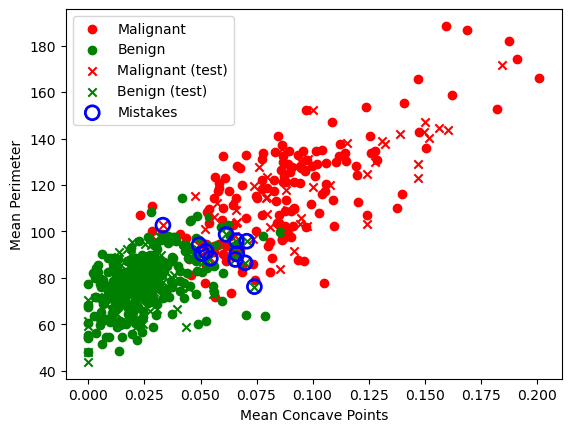

In [73]:
# Plot the training data
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
            color='r', marker='o', label='Malignant')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
            color='g', marker='o', label='Benign')

# Plot the test data
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], 
            color='r', marker='x', label='Malignant (test)')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 
            color='g', marker='x', label='Benign (test)')

# Plot the mistakes in the test data
plt.scatter(X_test[y_test != y_pred, 0], X_test[y_test != y_pred, 1], 
            color='b', marker='o', facecolors='none', s=100, 
            linewidths=2, label='Mistakes')

plt.xlabel('Mean Concave Points')
plt.ylabel('Mean Perimeter')
plt.legend()
plt.show()

### Print the standard machine learning diagnostics

In [74]:
# Print the confusion matrix, accuracy score, and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[49  5]
 [ 7 82]]
Accuracy Score: 0.916083916083916
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89        54
           1       0.94      0.92      0.93        89

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



---

## Nearest neighbor classifier (k=3)

## Import libraries

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


## Load the data

In [76]:
# Load the breast cancer dataset
data = load_breast_cancer()

## Make our `x` predictor data

#### Get the predicer names and put into a Python list

In [77]:
feature_names = data.feature_names.tolist()

#### Get the indexes of our predicer names

In [78]:
# Find the indices of 'mean concave points' and 'mean perimeter'
mean_concave_points_idx = feature_names.index('mean concave points')
mean_perimeter_idx = feature_names.index('mean perimeter')

#### Make our X (predictor) and y (target) data.

In [79]:
# Create a NumPy array containing only the specified variables
X = data.data[:, [mean_concave_points_idx, mean_perimeter_idx]]

## Make our `y` target data

In [80]:
y = data.target

## Split the data into training and test sets

In [81]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

### Make the classifier

In [82]:
# Train the k=3 nearest neighbor classifier
knn = KNeighborsClassifier(n_neighbors=3)

### Train it on the training data

In [83]:
# Train the k=3 nearest neighbor classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Generate predicted values basue on the test predictors

In [84]:
# Make predictions for the test set
y_pred = knn.predict(X_test)

### Make another fancy plot!

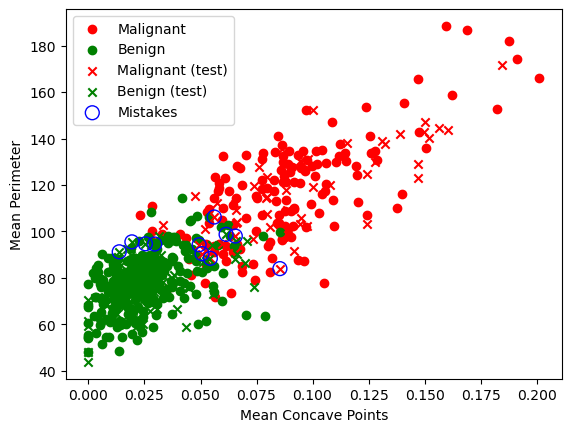

In [85]:
# Plot the training data
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
            color='r', marker='o', label='Malignant')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
            color='g', marker='o', label='Benign')

# Plot the test data
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], 
            color='r', marker='x', label='Malignant (test)')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 
            color='g', marker='x', label='Benign (test)')

# Plot the mistakes in the test data
plt.scatter(X_test[y_test != y_pred, 0], X_test[y_test != y_pred, 1], 
            color='b', marker='o', facecolors='none', s=100, 
            linewidths=1, label='Mistakes')

plt.xlabel('Mean Concave Points')
plt.ylabel('Mean Perimeter')
plt.legend()
plt.show()


### Print the standard machine learning diagnostics

In [86]:
# Print the confusion matrix, accuracy score, and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[48  6]
 [ 5 84]]
Accuracy Score: 0.9230769230769231
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        54
           1       0.93      0.94      0.94        89

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

